Random Forest:
              precision    recall  f1-score   support

           1       0.20      0.20      0.20         5
           2       0.00      0.00      0.00         5
           3       0.25      0.25      0.25         8
           4       0.20      0.11      0.14         9
           5       0.00      0.00      0.00         5
           6       0.11      0.17      0.13         6
           7       0.00      0.00      0.00         7

    accuracy                           0.11        45
   macro avg       0.11      0.10      0.10        45
weighted avg       0.12      0.11      0.11        45



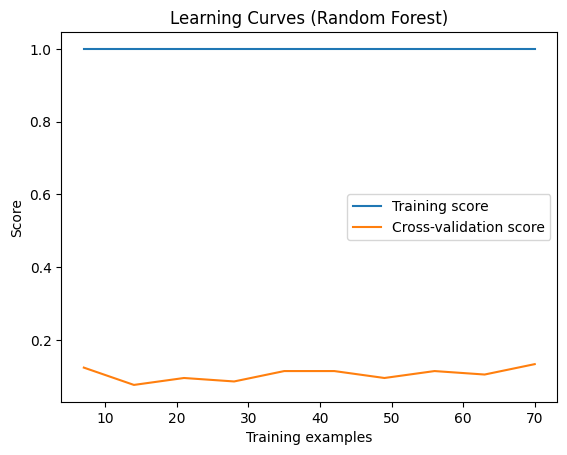

In [ ]:
# Obtener los mejores hiperparámetros y el mejor modelo SVM
if hasattr(svm_grid, 'best_params_'):

    # Construir un pipeline para el modelo Random Forest
    rf_pipe = Pipeline([
        ('rf', RandomForestClassifier())
    ])

    # Definir la grilla de hiperparámetros para GridSearchCV
    param_grid_rf = {
        'rf__n_estimators': [100, 200],
        'rf__max_depth': [10, 20]
    }

    # Realizar búsqueda de hiperparámetros para Random Forest
    rf_grid = GridSearchCV(rf_pipe, param_grid_rf, cv=3, error_score='raise')
    rf_grid.fit(X_train, y_train)

    # Obtener los mejores hiperparámetros y el mejor modelo Random Forest
    best_params_rf = rf_grid.best_params_
    best_model_rf = rf_grid.best_estimator_

    # Evaluar los modelos en el conjunto de prueba
    y_pred_rf = best_model_rf.predict(X_test)

    # Imprimir métricas de evaluación
    print("Random Forest:")
    print(classification_report(y_test, y_pred_rf))

    #Realizar curvas de aprendizaje
    train_sizes_rf, train_scores_rf, valid_scores_rf = learning_curve(best_model_rf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3)

    #Visualizar curvas de aprendizaje
    plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training score')
    plt.plot(train_sizes_rf, np.mean(valid_scores_rf, axis=1), label='Cross-validation score')
    plt.title('Learning Curves (Random Forest)')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend()
    plt.show()